# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Sentimen IG.xlsx')
df

,user_id,profile_pic_url,text,username
0,44360008603,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Heeemm miris btl,sukmayaaris
1,65390624368,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,Aneh dr pasal2 itu saja sdh kelihatan ga ada y...,akhtarmalik4887
2,13972150218,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,@irsyafilms mungkin disini yg di maksut kerjaa...,dodikbintoroe
4,2070272562,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,@ptrdr 19 juta lapangan pekerjaan😂,fadhil.shl
...,...,...,...,...
2187,7044990267,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,@ru.unplugged,usamthings
2188,64253264668,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,@mfrizky94 blokk,rumah_puisi03
2189,4580994133,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,Yaaa masuk kejaksaan🤪,krismukk
2190,4180703319,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Terima kasih kaum 58%.kalian membuat kami semu...,_aafadli


# Cleaning Data

In [ ]:
df

,user_id,profile_pic_url,text,username
0,44360008603,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Heeemm miris btl,sukmayaaris
1,65390624368,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,Aneh dr pasal2 itu saja sdh kelihatan ga ada y...,akhtarmalik4887
2,13972150218,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,@irsyafilms mungkin disini yg di maksut kerjaa...,dodikbintoroe
4,2070272562,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,@ptrdr 19 juta lapangan pekerjaan😂,fadhil.shl
...,...,...,...,...
2187,7044990267,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,@ru.unplugged,usamthings
2188,64253264668,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,@mfrizky94 blokk,rumah_puisi03
2189,4580994133,https://instagram.fsoc1-1.fna.fbcdn.net/v/t51....,Yaaa masuk kejaksaan🤪,krismukk
2190,4180703319,https://instagram.fsoc1-2.fna.fbcdn.net/v/t51....,Terima kasih kaum 58%.kalian membuat kami semu...,_aafadli


In [ ]:
df = df[['user_id', 'text', 'username']]

In [ ]:
df['text'] = df['text'].replace('false', pd.NA)
df = df.dropna(subset=['text'])

/tmp/ipython-input-11-3691035515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].replace('false', pd.NA)


In [ ]:
df.shape

(2170, 3)

In [ ]:
df = df.drop_duplicates(subset=['text'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
user_id,0
text,0
username,0


In [ ]:
def clean_twitter_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus username
    text = re.sub(r'@\w+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus tanda baca dan angka
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Menghapus spasi yang berlebihan
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'br', ' ',text).strip()
    text = re.sub(r'quot', ' ',text).strip()

    return text

df['text'] = df['text'].apply(clean_twitter_text)

In [ ]:
df

,user_id,text,username
0,44360008603,Heeemm miris btl,sukmayaaris
1,65390624368,Aneh dr pasal itu saja sdh kelihatan ga ada yg...,akhtarmalik4887
2,13972150218,Yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,mungkin disini yg di maksut kerjaaan tni namba...,dodikbintoroe
4,2070272562,juta lapangan pekerjaan,fadhil.shl
...,...,...,...
2187,7044990267,unplugged,usamthings
2188,64253264668,blokk,rumah_puisi03
2189,4580994133,Yaaa masuk kejaksaan,krismukk
2190,4180703319,Terima kasih kaum kalian membuat kami semua ke...,_aafadli


In [ ]:
df.drop_duplicates(subset="text", keep='first', inplace = True)
df

,user_id,text,username
0,44360008603,Heeemm miris btl,sukmayaaris
1,65390624368,Aneh dr pasal itu saja sdh kelihatan ga ada yg...,akhtarmalik4887
2,13972150218,Yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,mungkin disini yg di maksut kerjaaan tni namba...,dodikbintoroe
4,2070272562,juta lapangan pekerjaan,fadhil.shl
...,...,...,...
2187,7044990267,unplugged,usamthings
2188,64253264668,blokk,rumah_puisi03
2189,4580994133,Yaaa masuk kejaksaan,krismukk
2190,4180703319,Terima kasih kaum kalian membuat kami semua ke...,_aafadli


# Preprocessing Data

## Case folding

In [ ]:
def case_folding(text):
  return text.lower()

df['text'] = df['text'].apply(case_folding)
df

,user_id,text,username
0,44360008603,heeemm miris btl,sukmayaaris
1,65390624368,aneh dr pasal itu saja sdh kelihatan ga ada yg...,akhtarmalik4887
2,13972150218,yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,mungkin disini yg di maksut kerjaaan tni namba...,dodikbintoroe
4,2070272562,juta lapangan pekerjaan,fadhil.shl
...,...,...,...
2187,7044990267,unplugged,usamthings
2188,64253264668,blokk,rumah_puisi03
2189,4580994133,yaaa masuk kejaksaan,krismukk
2190,4180703319,terima kasih kaum kalian membuat kami semua ke...,_aafadli


## Normalize

In [ ]:
norm = { "dgn":"dengan","mpr":"majelis permusyawaratan rakyat","permpasan" :"perampasan", "hrs":"harus", "bgtu":"begitu","kyk":"kaya","dlu":"dulu", "mk":"mahkamah konstitusi", "mrk":"mereka", "mgp":"menganggap",
        "nkri":"negara kesatuan republik indonesia", "byk" : "banyak", "brp" : "berapa", "dwipungsi":"dwi fungsi","dwi pungsi":"dwifungsi", "skrg":"sekarang", "derama":"drama", "koropsi":"korupsi","wowo":"prabowo subianto", "hars" : "harus", "repormasi":"reformasi",
        "dirut":"direktur utama", "irjen":"Inspektur Jenderal", "mayjen":"mayor jenderal", "letkol":"letnan kolonel", "knp": "kenapa", "mngp": "mengapa", "bbrp": "beberapa", "tsb": "tersebut","lg": "lagi", "pake": "pakai", "org": "orang", "wong": "orang",
        "adl": "adalah","mmg": "memang","emang":"memang","emg":"memang", "spt": "seperti","spy": "supaya","ketum": "ketua umum", "menhan": "menteri pertahanan","dpr":"dewan perwakilan rakyat","klo": "kalau","kalo": "kalau","klu": "kalau","klau":"kalau", "bnyk": "banyak","byk": "banyak",
        "knp": "kenapa","mngp": "mengapa","mngapa": "mengapa","bbrp": "beberapa","bakal": "akan","bakalan": "akan","bnr": "benar", "bener": "benar", "skrg": "sekarang","skrng": "sekarang","msh": "masih","bhw": "bahwa","gimana": "bagaimana","dmn": "dimana","dlm": "dalam",
        "duid": "uang","duit": "uang", "nyari": "cari", "naek": "naik","mau": "ingin","sdh": "sudah","udh": "sudah","jkt": "jakarta","jateng": "jawa tengah","jatim": "jawa timur", "jabar": "jawa barat","jdi": "jadi", "jd": "jadi","sbg": "sebagai","sbgi": "sebagai",
        "scr": "secara","sampe": "sampai","sprt" : "seperti","sperti":"seperti","trs": "terus","trus": "terus","ttp": "tetap","tapi": "tetapi","dkk": "dan kawan kawan","dll": "dan lain lain","dsb": "dan sebagainya","dst": "dan seterusnya", "krn": "karena",
        "krna": "karena", "yg": "yang", "pdhl": "padahal","aq":"saya","bgt": "banget","iy": "iya", "bkn": "bukan","blm": "belum","tak": "tidak","enggak": "tidak","nggak": "tidak","gak": "tidak","tdk": "tidak","jgn": "jangan","ama": "sama","drpd": "daripada",
        "dri": "dari","bsa": "dapat","bisa": "dapat","dpt": "dapat","cuma": "hanya","cuman": "hanya","cma": "hanya","blh": "boleh","shga": "sehingga", "tsb": "tersebut","thdp": "terhadap","liat": "lihat", "survey": "survei","lbh": "lebih","donkkkk":"dong","dongggg": "dong","maslaah":"masalah","orba":"orde baru",
        "mensahkan":"mengesahkan","lenserkan":"lengserkan","lajnnya": "lainnya"
}
def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['text'] = df['text'].apply(lambda x: normalisasi(x))
df

,user_id,text,username
0,44360008603,heeemm miris btl,sukmayaaris
1,65390624368,aneh dr pasal itu saja sudah kelihatan ga ada ...,akhtarmalik4887
2,13972150218,yang harusnya berada pada zona netral kini sud...,putriandayanimuslim
3,1506741981,mungkin disini yang di maksut kerjaaan tni nam...,dodikbintoroe
4,2070272562,juta lapangan pekerjaan,fadhil.shl
...,...,...,...
2187,7044990267,unplugged,usamthings
2188,64253264668,blokk,rumah_puisi03
2189,4580994133,yaaa masuk kejaksaan,krismukk
2190,4180703319,terima kasih kaum kalian membuat kami semua ke...,_aafadli


## Remove Stopwords

In [ ]:
!pip install Sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['text'] = df['text'].apply(lambda x: stopword(x))
df

,user_id,text,username
0,44360008603,heeemm miris btl,sukmayaaris
1,65390624368,aneh dr pasal saja kelihatan ga permasalahkan ...,akhtarmalik4887
2,13972150218,harusnya berada zona netral kini pindah haluan...,putriandayanimuslim
3,1506741981,mungkin disini di maksut kerjaaan tni nambah k...,dodikbintoroe
4,2070272562,juta lapangan pekerjaan,fadhil.shl
...,...,...,...
2187,7044990267,unplugged,usamthings
2188,64253264668,blokk,rumah_puisi03
2189,4580994133,yaaa masuk kejaksaan,krismukk
2190,4180703319,terima kasih kaum kalian membuat semua ketar k...,_aafadli


## Tokenizing

In [ ]:
tokenized = df['text'].apply(lambda x:x.split())
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilTokenizingIG.xlsx", index=False)
tokenized

,text
0,"[heeemm, miris, btl]"
1,"[aneh, dr, pasal, saja, kelihatan, ga, permasa..."
2,"[harusnya, berada, zona, netral, kini, pindah,..."
3,"[mungkin, disini, di, maksut, kerjaaan, tni, n..."
4,"[juta, lapangan, pekerjaan]"
...,...
2187,[unplugged]
2188,[blokk]
2189,"[yaaa, masuk, kejaksaan]"
2190,"[terima, kasih, kaum, kalian, membuat, semua, ..."


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

heeemm miris btl
aneh dr pasal saja lihat ga masalah mmemang beberapa pos harus di isi orang punya jiwa korsa tni mereka isi pos bumn sy ga tuju kalau pos yang daftar sy rasa sangat wajar di isi perwira tni sy optimis indonesia terang
harus ada zona netral kini pindah haluan haluan bukan rakyat paham aja bahkan malaikat masuk parlemen dapat ubah jadi iblis
mungkin sini di maksut kerjaaan tni nambah kalau masalah gaji entah tunjang apa kn blom tau gaji tni standart ga wah seperti pegawai pajak lain
juta lapang kerja
shl dulu mulyono ngomongnya
ibu t bukan titiek
iyaa bang salah satu doang sisa banyak masuk adil pernah adil ssama sipil biasa adil militer tidak transparan
apa gara tedy
dewan wakil rakyat dewan hancur rakyat
baca bukan aktif tni aktif boleh undur diri
jadi pangeran nerusken aja a
arti sudah punya gelar s dong ikut masuk tni jangan batas umur
uu tni sah untuk lawan rakyat sendiri
blok
bukan langgar uu clokk hidup politik politik jujur tanggung jawab bukan malah na ak uu
hal

In [ ]:
tokenized.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilstemmingIG.xlsx", index=False)

# Labeling Data with Texblob

In [ ]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

In [ ]:
df = pd.DataFrame(df['text'])
data = pd.DataFrame(df['text'])
translator = Translator()
translations = {}

for column in df.columns:
    #unique elements dari kolom
    unique_elements = df[column].unique()
    for element in unique_elements:
      translations[element] = translator.translate(element).text

#masukin hasil translate ke kolom baru
data['translated_text'] = df.replace(translations)
data['translated_text'] = data['translated_text'].str.lower()

data

,text,translated_text
0,heeemm miris btl,heeemm sad btl
1,aneh dr pasal saja kelihatan ga permasalahkan ...,"strange from the article, it seems that there ..."
2,harusnya berada zona netral kini pindah haluan...,being in a neutral zone is now moving the dire...
3,mungkin disini di maksut kerjaaan tni nambah k...,maybe here is meant by the work of the tni to ...
4,juta lapangan pekerjaan,million jobs
...,...,...
2187,unplugged,unplugged
2188,blokk,block
2189,yaaa masuk kejaksaan,yaaa entered the prosecutor's office
2190,terima kasih kaum kalian membuat semua ketar k...,thank you for your people to make all the time


In [ ]:
import textblob
from textblob import TextBlob

data_tweet = list(data['translated_text'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')
data['sentimen']=status
data

Hasil Analisis Data:
Positif = 658
Netral = 1066
Negatif = 297

Total Data : 2021


,text,translated_text,sentimen
0,heeemm miris btl,heeemm sad btl,Negatif
1,aneh dr pasal saja kelihatan ga permasalahkan ...,"strange from the article, it seems that there ...",Positif
2,harusnya berada zona netral kini pindah haluan...,being in a neutral zone is now moving the dire...,Netral
3,mungkin disini di maksut kerjaaan tni nambah k...,maybe here is meant by the work of the tni to ...,Negatif
4,juta lapangan pekerjaan,million jobs,Netral
...,...,...,...
2187,unplugged,unplugged,Netral
2188,blokk,block,Netral
2189,yaaa masuk kejaksaan,yaaa entered the prosecutor's office,Netral
2190,terima kasih kaum kalian membuat semua ketar k...,thank you for your people to make all the time,Netral


In [ ]:
data.to_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingIG.xlsx", index=False)

# Feature Selection TF IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingIG.xlsx")
column = 'text'

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek TfidfVectorizer terlebih dahulu to learn the vocabulary with max_features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Transformasi teks dengan TfidfVectorizer to fit and learn the vocabulary
tfs = tfidf_vectorizer.fit_transform(data[column])

# Get the vocabulary from the fitted TfidfVectorizer
vocabulary = tfidf_vectorizer.vocabulary_

# Membuat objek CountVectorizer using the vocabulary from TfidfVectorizer
count_vectorizer = CountVectorizer(vocabulary=vocabulary)

# Transformasi teks dengan CountVectorizer using the same vocabulary
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Get the IDF vector from the fitted TfidfVectorizer
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
# The shapes should now be consistent for multiplication
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

,aamiin,aamiin ndan,aamin,aamin allah,abah,abah datang,abah gue,abah jadi,abah tantrum,abah ye,...,zionis,zionis malah,zona,zona netral,zoom,zoom ssama,zsaman,zsaman abri,zsaman marsekal,zsaman molyono
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.565621,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFIG.xlsx'

# Simpan DataFrame ke dalam file CSV
data.to_excel(file_path, index=False)

# Smote

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasillabelingIG.xlsx")
column = "text"
y = data['sentimen']
tf_idf = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/HasilTFIDFIG.xlsx")


# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

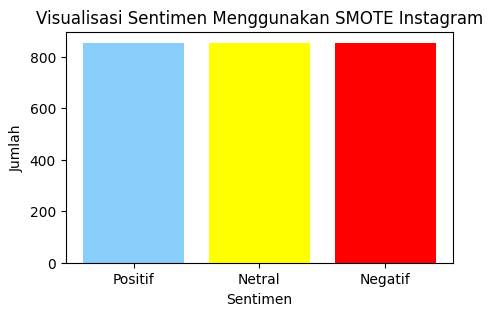

In [ ]:
import matplotlib.pyplot as plt
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['lightskyblue','yellow','red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE Instagram')
plt.show()

# SVM Classification

In [ ]:
param_grid_svm = {
    'C':[1],
    'kernel': ['linear'],
    'class_weight': ['balanced'],
}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold

np.random.seed(30)
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=30)

svmModel = SVC()
svmModel_grid = GridSearchCV(estimator=svmModel, param_grid=param_grid_svm ,cv=cv1)
svmModel_grid.fit(tf_idf, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=30, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1], 'class_weight': ['balanced'],
                         'kernel': ['linear']})

In [ ]:
from sklearn.metrics import classification_report , accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = svmModel_grid.predict(X_test)
print(classification_report(y_test, y_pred))

print("Akurasi nya adalah : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision nya adalah : {:.2f}%".format(precision_score(y_test, y_pred, average='weighted') * 100))
print("Recall nya adalah : {:.2f}%".format(recall_score(y_test, y_pred, average='weighted')* 100) )
print("F1 Score nya adalah : {:.2f}%".format(f1_score(y_test, y_pred, average='weighted')* 100))


cm = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmModel_grid.classes_)
Disp.plot()
plt.show()

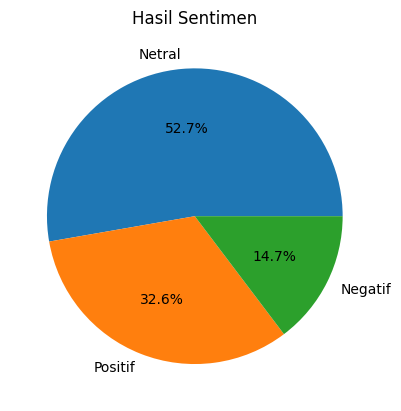

In [ ]:
import matplotlib.pyplot as plt

sentimen = data['sentimen'].value_counts()

plt.pie(sentimen, labels=sentimen.index, autopct='%1.1f%%')
plt.title('Hasil Sentimen')
plt.show()